## TASK 1 - Understand the problem statement.

- The objective of this case study is to predict the employee salary based on the number of years of experience. 
- In simple linear regression, we predict the value of one variable Y based on another variable X.
- X is called the independent variable and Y is called the dependant variable.
- Why simple? Because it examines relationship between two variables only.
- Why linear? when the independent variable increases (or decreases), the dependent variable increases (or decreases) in a linear fashion.


## TASK 2 - Import libraries and datasets.

In [3]:
!pip install tensorflow seaborn

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e2/7a/c7762c698fb1ac41a7e3afee51dc72aa3ec74ae8d2f57ce19a9cded3a4af/tensorflow-2.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/ea/df/55525e489c43f9dbb6c8ea27d8a567b3dcd18a22f3c45483055f5ca6611d/libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl.metadata
  Obtaining dependency information for ml-dtypes==0.2.0 from https://files.pythonhosted.org/p

In [6]:
!pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/e0/63/b428aaca15fcd98c39b07ca7149e24bc14205ad0f1c80ba2b01835aedde1/pip-23.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1


In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# read source csv file
salary_df = pd.read_csv('salary.csv')
print(salary_df.shape)
salary_df.head()

(35, 2)


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [10]:
salary_df.tail()

,YearsExperience,Salary
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [52]:
print(salary_df['Salary'].min())
print('\n')
print(salary_df['Salary'].max())

37731


139465


### TASK #3: Perform exploratory data analysis and visualization

<AxesSubplot:>

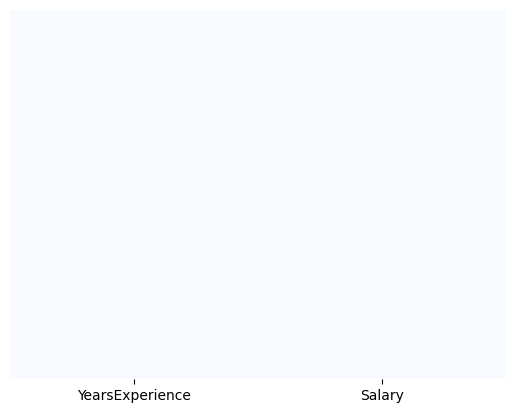

In [12]:
# Check if there are any Null Values
sns.heatmap(salary_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [14]:
# Check the dataframe info
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [15]:
# Statistical summary of the dataframe
salary_df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


MINI CHALLENGE
 - What are the number of years of experience corresponding to employees with minimum and maximim salaries?

In [20]:
print(f'Employees with minimum salaries:\n{salary_df.min()}')
print('\n')
print(f'Employees with maximum salaries:\n{salary_df.max()}')

Employees with minimum salaries:
YearsExperience        1.1
Salary             37731.0
dtype: float64


Employees with maximum salaries:
YearsExperience        13.5
Salary             139465.0
dtype: float64


In [55]:
# Employee w/maximum salary
max = salary_df[salary_df['Salary']==salary_df['Salary'].max()]
max

,YearsExperience,Salary
34,13.5,139465


In [57]:
# Employee v/minimum salary
min = salary_df[salary_df['Salary']==salary_df['Salary'].min()]
min

,YearsExperience,Salary
2,1.5,37731


array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

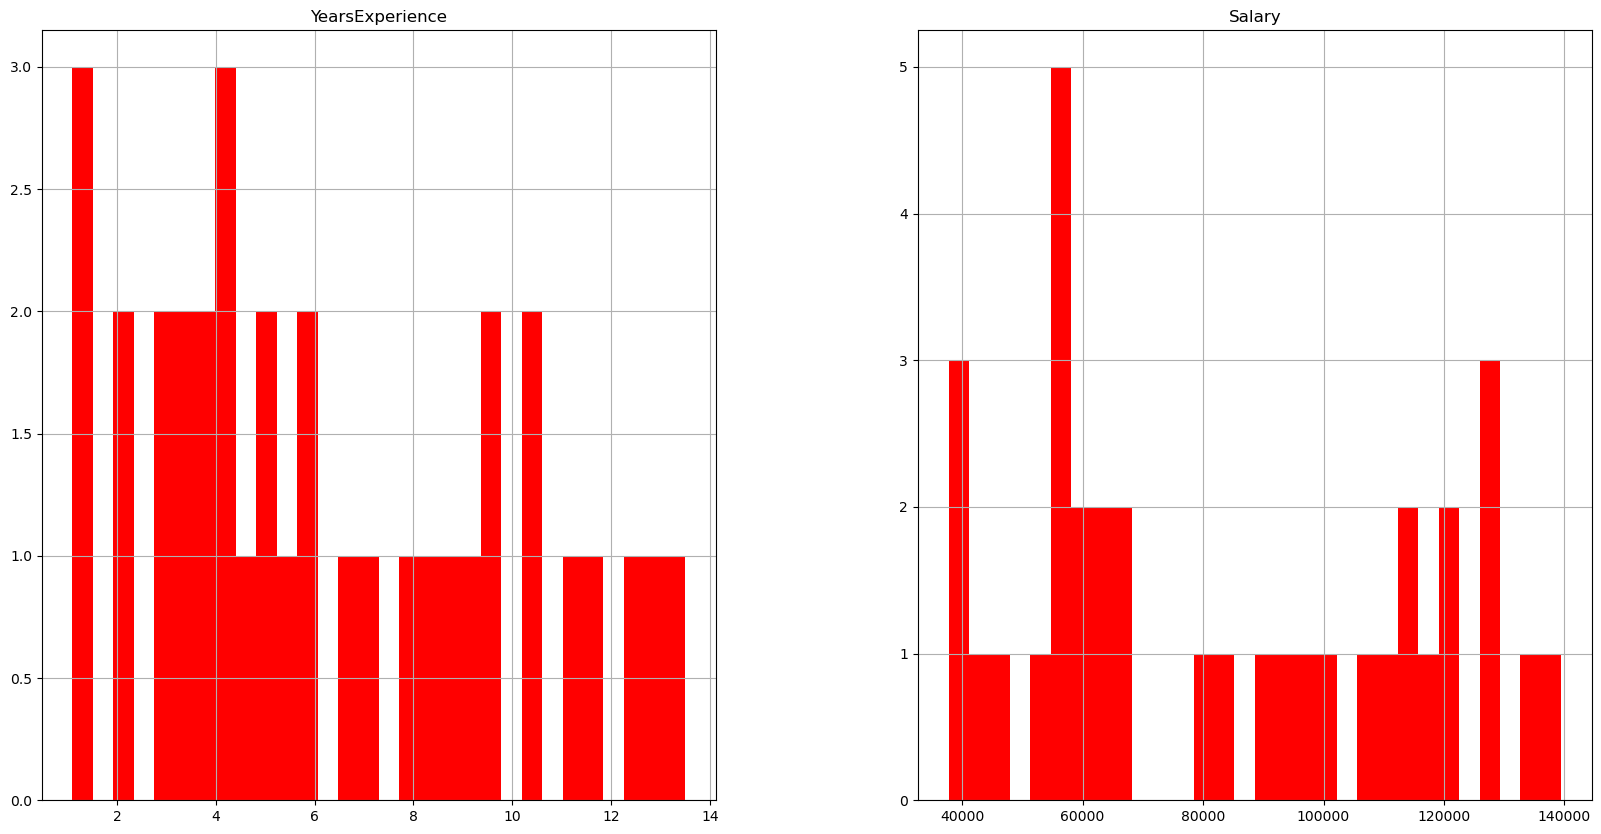

In [22]:
salary_df.hist(bins = 30, figsize = (20,10), color = 'r')

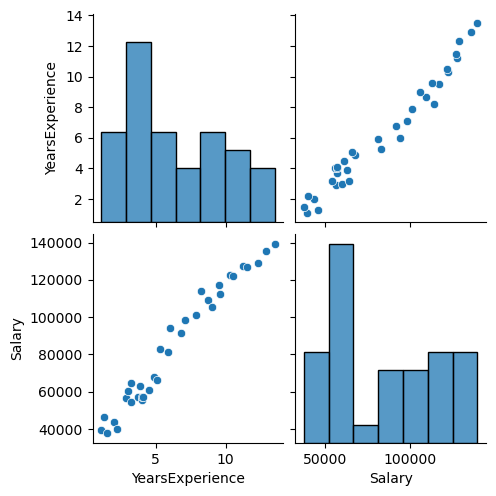

In [23]:
# Plot pairplot
sns.pairplot(salary_df)

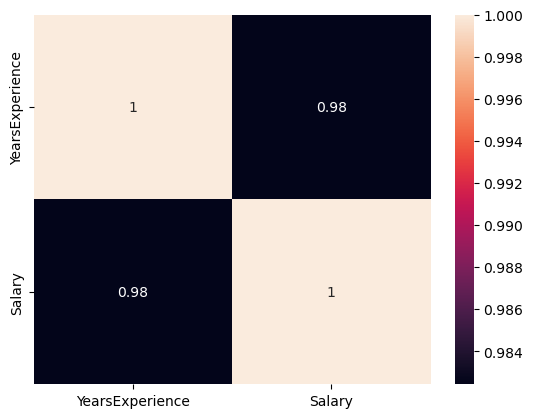

In [24]:
corr_matrix = salary_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

MINI CHALLENGE
- Use regplot in Seaborn to obtain a straight line fit between "salary" and "years of experience"

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

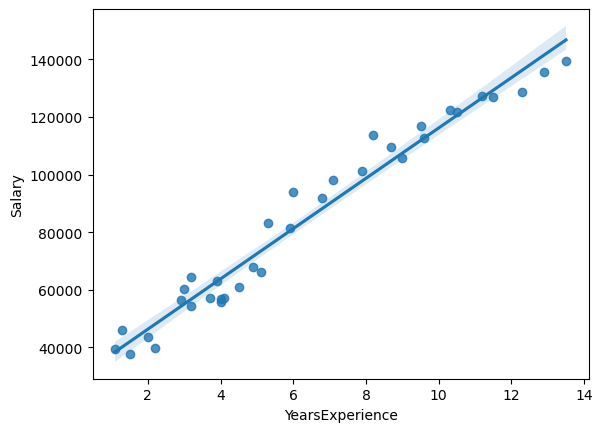

In [25]:
sns.regplot(data = salary_df, x = 'YearsExperience', y = 'Salary')

### TASK #4: Create Training and Testing Dataset

In [26]:
X = salary_df[['YearsExperience']]
y = salary_df[['Salary']]

In [27]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [28]:
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [30]:
X.shape

(35, 1)

In [31]:
y.shape

(35, 1)

In [32]:
# Convert the X and y to numpy arrays
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [33]:
# Only take the numerical variables and scale them
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]], dtype=float32)

In [34]:
# Split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
X_train

array([[ 8.7],
       [ 5.1],
       [11.5],
       [ 7.9],
       [ 9.6],
       [ 4.1],
       [10.5],
       [ 3.2],
       [ 2. ],
       [ 9.5],
       [ 4.9],
       [ 9. ],
       [ 3.7],
       [ 4.5],
       [ 3.9],
       [ 3. ],
       [ 7.1],
       [11.2],
       [ 6. ],
       [13.5],
       [ 1.3],
       [ 1.5],
       [ 5.3],
       [12.3],
       [12.9],
       [ 8.2],
       [ 6.8],
       [ 4. ]], dtype=float32)

In [36]:
X_test

array([[ 1.1],
       [10.3],
       [ 4. ],
       [ 2.9],
       [ 2.2],
       [ 3.2],
       [ 5.9]], dtype=float32)

MINI CHALLENGE
 - Try splitting the data into 75% for training and the rest for testing
 - Verify that the split was successful by obtaining the shape of both X_train and X_test
 - Did you notice any change in the order of the data? why?

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [40]:
X_train

array([[ 4.1],
       [13.5],
       [ 3.7],
       [ 8.2],
       [ 2.2],
       [ 2. ],
       [ 3.2],
       [ 1.3],
       [ 6.8],
       [ 6. ],
       [ 4. ],
       [ 4.9],
       [ 8.7],
       [ 3. ],
       [ 7.1],
       [10.5],
       [ 1.1],
       [11.2],
       [12.3],
       [12.9],
       [ 2.9],
       [ 3.9],
       [ 5.3],
       [ 9. ],
       [ 4.5],
       [ 5.9]], dtype=float32)

X_test

### TASK #5: Train a Linear Regression Model in sk-learn (Note That Sagemaker Built-In Algorithms Are Not Used Here)

In [42]:
# Using Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score


regression_model_sklearn = LinearRegression(fit_intercept = True)
regression_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [44]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.9699404710059987

In [45]:
print('Linear Model Coefficient (m): ', regression_model_sklearn.coef_)
print('\n')
print('Linear Model Coefficient (b): ', regression_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[8594.488]]


Linear Model Coefficient (b):  [29784.469]


MINI CHALLENGE
- Retrain the model while setting the fit_intercept = False, what do you notice?

In [46]:
regression_model_sklearn = LinearRegression(fit_intercept = False)
regression_model_sklearn.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [47]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.8507788675336447

In [49]:
print('Linear Model Coefficient (m): ', regression_model_sklearn.coef_)
print('\n')
print('Linear Model Coefficient (b): ', regression_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[12217.687]]


Linear Model Coefficient (b):  0.0


### TASK #6: Evaluate Trained Model Performance (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [50]:
y_predict = regression_model_sklearn.predict(X_test)

In [51]:
y_predict

array([[ 39096.598],
       [116068.02 ],
       [ 48870.746],
       [ 96519.73 ],
       [117289.8  ],
       [125842.17 ],
       [140503.39 ],
       [ 62310.2  ],
       [ 18326.53 ]], dtype=float32)

Text(0.5, 1.0, 'Salary VS. Years of Experience')

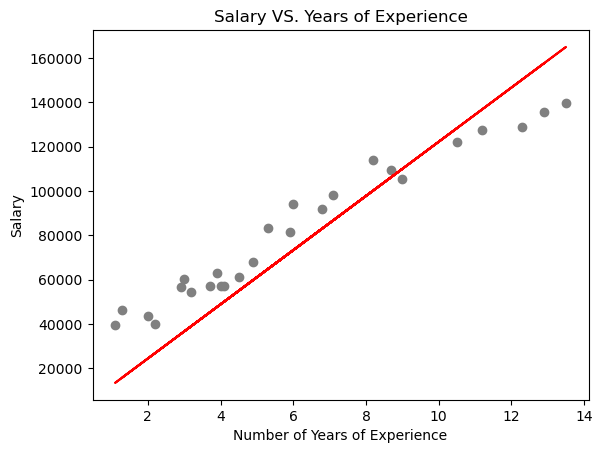

In [53]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regression_model_sklearn.predict(X_train), color = 'red')
plt.ylabel('Salary')
plt.xlabel('Number of Years of Experience')
plt.title('Salary VS. Years of Experience')

MINI CHALLENGE
 - Use the trained model, obtain the salary corresponding to eployees who have years of experience = 5